Hace falta algo que indique con qué entorno vamos a trabajar

Importar lo que hace falta

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data_url = "../Data/properatti.csv"

In [3]:
data = pd.read_csv(data_url, encoding="utf-8")

In [4]:
data.shape

(121220, 26)

Confirmar los valores de la serie 'currency'

In [5]:
data['currency'].value_counts()

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

Retenemos sólo las observaciones que correspondan a 'USD'

In [6]:
data = data[data['currency'] == 'USD']

In [7]:
data.shape

(87587, 26)

Determinar si la serie 'price' es igual que 'price_aprox_usd'
La suma de valores True debe ser igual a la cantidad de observaciones

In [8]:
sum(data['price'] == data['price_aprox_usd'])

87587

No hacen falta las series currency, price_aprox_local_currency y price_aprox_usd

In [9]:
data = data.drop(['currency', 'price_aprox_local_currency', 'price_aprox_usd'], axis='columns')

In [10]:
data.shape

(87587, 23)

In [11]:
data.isnull().sum()

Unnamed: 0                     0
operation                      0
property_type                  0
place_name                    23
place_with_parent_names        0
country_name                   0
state_name                     0
geonames_id                16141
lat-lon                    35051
lat                        35051
lon                        35051
price                          0
surface_total_in_m2        27267
surface_covered_in_m2      10355
price_usd_per_m2           27454
price_per_m2               10357
floor                      81278
rooms                      51573
expenses                   74935
properati_url                  0
description                    1
title                          0
image_thumbnail             1542
dtype: int64

Determinar que ocurre con price y surface

---

Hasta aquí se copia de TP1.01

---

In [12]:
work1 = data[data['surface_total_in_m2'].notnull() & (data['surface_total_in_m2'] > 0)]

In [13]:
work1.shape

(60133, 23)

In [14]:
sum(round(work1['price_usd_per_m2'],2) != round(work1['price'] / work1['surface_total_in_m2'],2))

0

Hasta aquí determinamos que hay valores de superficie menores o iguales a cero 

Determinamos que el price_usd_per_m2 está calculado de los otros valores válidos

Hay que hacer lo mismo con los valores para metros cubiertos ...

In [23]:
capfed =data[data['state_name'] == 'Capital Federal']
capfed =capfed[capfed['property_type'] == 'house']

In [24]:
capfed[['price', 'surface_total_in_m2']].corr()

,price,surface_total_in_m2
price,1.000000,0.582766
surface_total_in_m2,0.582766,1.000000


<AxesSubplot:xlabel='surface_total_in_m2', ylabel='price'>

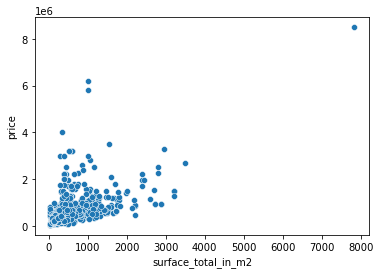

In [27]:
sns.scatterplot(x=capfed['surface_total_in_m2'], y=capfed['price'])

In [28]:
data['state_name'].value_counts()

Capital Federal                 27826
Bs.As. G.B.A. Zona Norte        22899
Bs.As. G.B.A. Zona Sur          11718
Buenos Aires Costa Atlántica     8702
Bs.As. G.B.A. Zona Oeste         7117
Córdoba                          4340
Santa Fe                         1615
Buenos Aires Interior            1586
Corrientes                        466
Mendoza                           318
Río Negro                         312
Chubut                            157
Neuquén                           156
San Luis                          154
Entre Ríos                         55
Misiones                           54
Salta                              27
Catamarca                          23
Tucumán                            18
Chaco                              11
La Pampa                           10
Tierra Del Fuego                    9
Santa Cruz                          7
Jujuy                               3
Santiago Del Estero                 2
San Juan                            1
La Rioja    

In [31]:
cordoba =data[data['state_name'] == 'Córdoba']
cordoba[['price', 'surface_total_in_m2']].corr()

,price,surface_total_in_m2
price,1.000000,0.314758
surface_total_in_m2,0.314758,1.000000


In [33]:
work =data[data['state_name'] == 'Bs.As. G.B.A. Zona Sur']
work[['price', 'surface_total_in_m2']].corr()

,price,surface_total_in_m2
price,1.0000,0.4655
surface_total_in_m2,0.4655,1.0000
